In [9]:
import imgaug as ia
from imgaug import augmenters as iaa
%matplotlib inline
ia.seed(1)
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
train_full = pd.read_csv('training_set.csv')

In [4]:
len(train_full)

24000

In [5]:
import cv2

In [6]:
rotation_array = [90,180,270]

In [7]:
import numpy as np

In [33]:
np.random.choice(rotation_array)

180

In [45]:
import os

In [46]:
os.mkdir('train_new_aug')

In [53]:
train_aug_new = pd.DataFrame(columns=['image_name','x1','y1','x2','y2'])

In [56]:
!pip install tqdm

catboost 0.11.2 requires enum34, which is not installed.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
tensorflow 1.10.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [57]:
from tqdm import tqdm


In [58]:
for i in tqdm(train_full.iterrows()):
    image = plt.imread('train/' + i[1]['image_name'])
    bbs = ia.BoundingBoxesOnImage([ia.BoundingBox(x1 = i[1]['x1'],x2 = i[1]['x2'],y1 = i[1]['y1'], y2 = i[1]['y2'])],shape = image.shape)
    ang = np.random.choice(rotation_array)
    rot = iaa.Affine(rotate=ang)
    image_aug = rot.augment_image(image)
    bbs_aug = rot.augment_bounding_boxes([bbs])[0]
    final_coords = bbs_aug.bounding_boxes[0].get_coords
    if(final_coords[0] < 0):
        final_coords[0] = 0
    if(final_coords[1] < 0):
        final_coords[1] = 0
    if(final_coords[2] > 640):
        final_coords[2] = 640
    if(final_coords[3] > 480):
        final_coords[3] = 480
    train_aug_new = train_aug_new.append({'image_name':'aug_new_{}'.format(i[1]['image_name']),'x1':final_coords[0],'y1':final_coords[1],'x2':final_coords[2],'y2':final_coords[3]}, ignore_index=True)
    plt.imsave('train_new_aug/' + 'aug_new_{}'.format(i[1]['image_name']), image_aug)
    

24000it [39:40,  9.64it/s]


In [77]:
train_aug_new.to_csv('train_aug_new.csv', index=False)

In [60]:
name = np.random.choice(os.listdir('train_new_aug/'))

In [62]:
from PIL import Image

In [64]:
import matplotlib.patches as patches

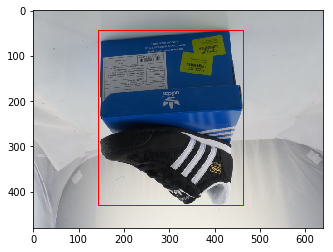

In [70]:
im = np.array(Image.open('train_new_aug/' + name), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

pre = train_aug_new.loc[train_aug_new['image_name'] == name, ['x1','y1','x2','y2']].values
# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((pre[0][0],pre[0][1]),pre[0][2] - pre[0][0] ,pre[0][3] - pre[0][1],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [71]:
check = pd.read_csv('submit_new_arch.csv')

In [72]:
check

,image_name,x1,y1,x2,y2
0,1467891670691DSC_0582.png,71.927704,84.168983,573.087585,428.725159
1,1475151786691DSC00560.png,222.006195,144.100204,448.157715,411.568726
2,1480334114405_R2A3620.png,179.458679,94.768372,429.994781,370.490814
3,JPEG_20160712_161047_1000606860114.png,218.655411,60.131523,526.353271,414.246063
4,JPEG_20160403_174522_-1137349501.png,122.633842,61.795990,528.162476,370.028778
5,1472901299234DSC_3812.png,52.371845,83.452339,584.204224,417.359253
6,JPEG_20160711_122349_1000194202357.png,207.811050,69.525787,444.419128,445.752808
7,1477045740188DSC_8170.png,15.279203,26.253105,638.855469,431.627838
8,14581995558443A.png,148.942032,131.476227,520.136414,405.795929
9,JPEG_20161116_182832_100030341860.png,55.235245,0.608547,510.221558,454.084686


In [74]:
x = pd.read_csv('test(1).csv')
x.columns

Index(['image_name', 'x1', 'x2', 'y1', 'y2'], dtype='object')